In [1]:
%matplotlib notebook
from matplotlib import pyplot as plt
import numpy as np
from numpy import pi

# SHOWING POTENTIAL LINES


In [2]:
np.arange(0, 1., 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [3]:
np.linspace(0, 1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [4]:
x, y = np.mgrid[0:1:10j, 0:1:5j]

<IPython.core.display.Javascript object>


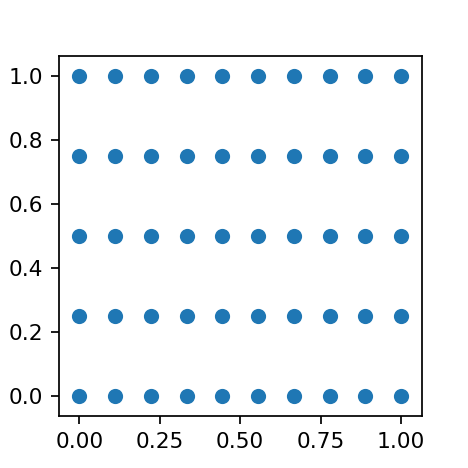

In [5]:
plt.figure(figsize=(3,3))
plt.scatter(x, y)

In [6]:
x, y = np.mgrid[-3:3:50j, -3:3:50j]


In [7]:
phi = 1.0/(2*pi)*x/(x*x + y*y + 0.00000001)

<IPython.core.display.Javascript object>


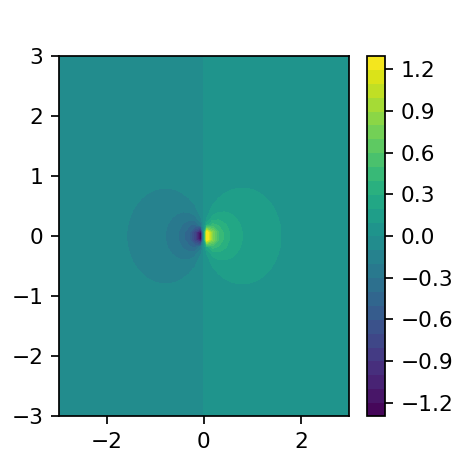

In [8]:
plt.figure(figsize=(3,3))
plt.contourf(x, y, phi,25); plt.colorbar();

<IPython.core.display.Javascript object>


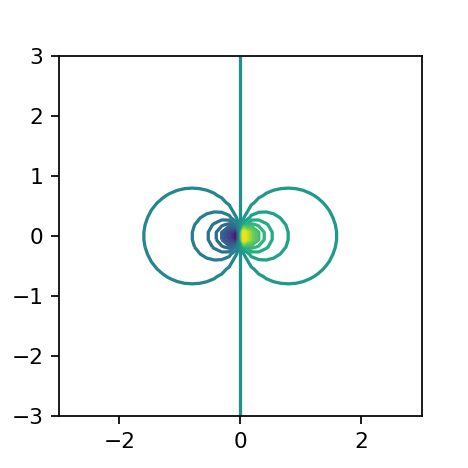

In [9]:
plt.figure(figsize=(3,3))
plt.contour(x, y, phi, 25);

# STREAMLINES

In [28]:
def doublet(r,t):
    x , y = r
    x1 = y*y - x*x 
    y1 = 2*x*y
    r1 = (x*x + y*y)*(x*x + y*y)
    u = x1/(2*pi*r1)
    v = -y1/(2*pi*r1)
    return np.array([u,v])

In [29]:
x, y = np.mgrid[-3:3:20j, -3:3:20j]
u, v = doublet((x, y), 0)

<IPython.core.display.Javascript object>


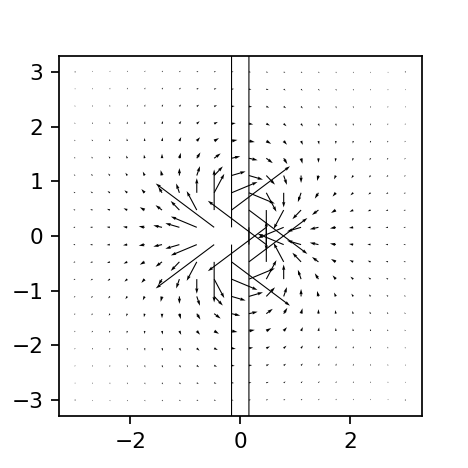

In [30]:
plt.figure(figsize=(3,3))
plt.quiver(x, y, u, v )

In [13]:
from scipy.integrate import odeint

<IPython.core.display.Javascript object>


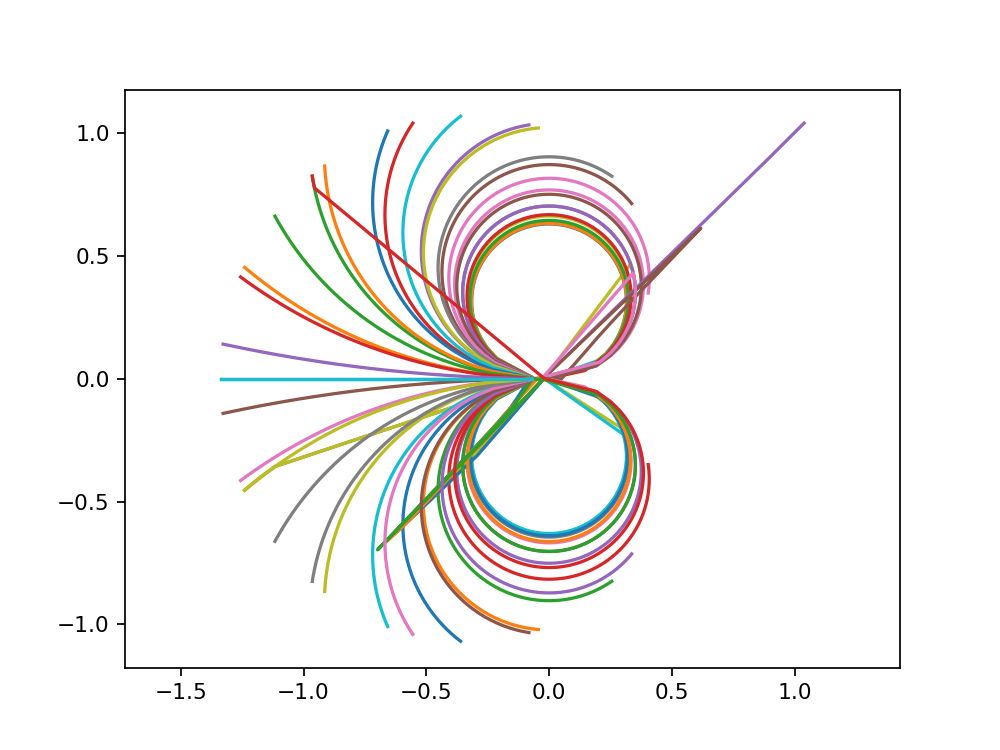

In [34]:
plt.figure()
plt.axis('equal')
t = np.linspace(0, 5, 200)
theta = np.linspace(0, 2*pi, 50)
r = 0.01
xg = r*np.cos(theta) - 0.08
yg = r*np.sin(theta)
for x, y in zip(xg, yg):
    result = odeint(doublet, (x, y), t)
    xr, yr = result.T
    plt.plot(xr, yr)

<IPython.core.display.Javascript object>


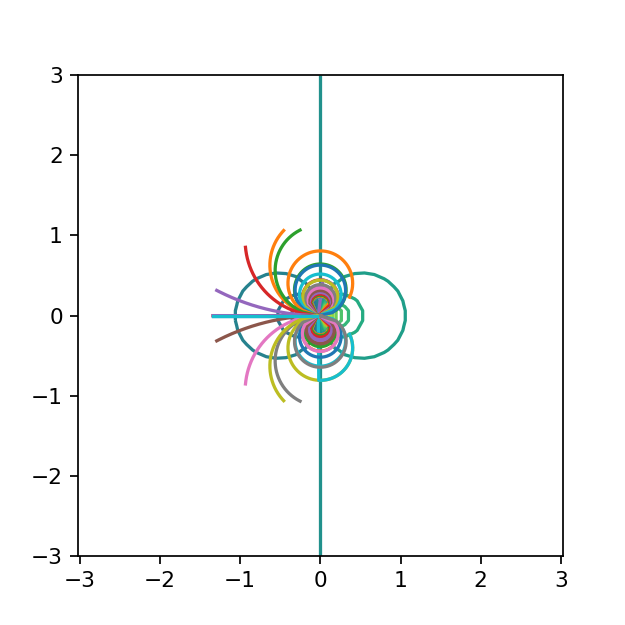

In [15]:
x, y = np.mgrid[-3:3:50j, -3:3:50j]
plt.figure(figsize=(4,4))
plt.contour(x, y, phi, 20);
plt.axis('equal')
t = np.linspace(0, 5, 200)
theta = np.linspace(0, 2*pi, 50)
r = 0.01
xg = r*np.cos(theta) - 0.05
yg = r*np.sin(theta)
for x, y in zip(xg, yg):
    result = odeint(doublet, (x, y), t)
    xr, yr = result.T
    plt.plot(xr, yr)

# free stream with zero angle of attack (and u=1) added to this doublet

In [16]:
x, y = np.mgrid[-3:3:50j, -3:3:50j]
phi = 1.0/(2*pi)*x/(x*x + y*y + 0.00000001) + x


<IPython.core.display.Javascript object>


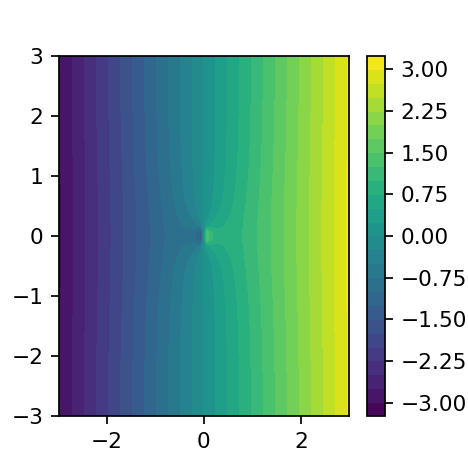

In [17]:
plt.figure(figsize=(3,3))
plt.contourf(x, y, phi,25); plt.colorbar();

<IPython.core.display.Javascript object>


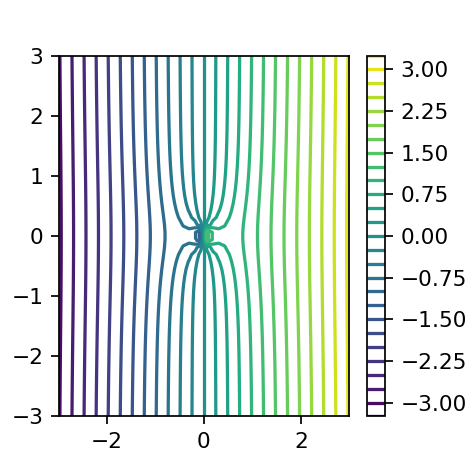

In [18]:
plt.figure(figsize=(3,3))
plt.contour(x, y, phi,25); plt.colorbar();

In [19]:
def flow(r, t):
    return doublet(r, t) + np.array([1, 0])

<IPython.core.display.Javascript object>


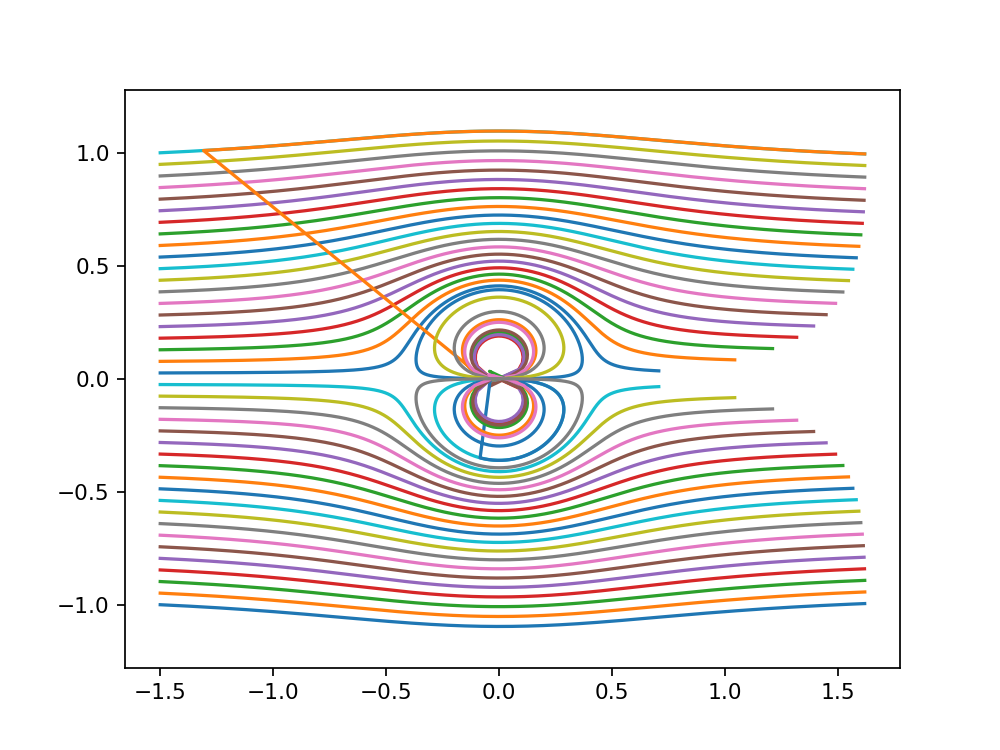

In [20]:
plt.figure()
plt.axis('equal')
xg = -1.5*np.ones(40)
yg = np.linspace(-1,1, 40)
t = np.linspace(0, 3, 1000)
for x, y in zip(xg, yg):
    result = odeint(flow, (x, y), t)
    xr, yr = result.T
    plt.plot(xr, yr)

theta = np.linspace(0 + 0.01 , 2*pi - 0.01 , 18)
r = 0.01
xg = r*np.cos(theta) - 0.05
yg = r*np.sin(theta)
for x, y in zip(xg, yg):
    result = odeint(flow, (x, y), t)
    xr, yr = result.T
    plt.plot(xr, yr)


<IPython.core.display.Javascript object>


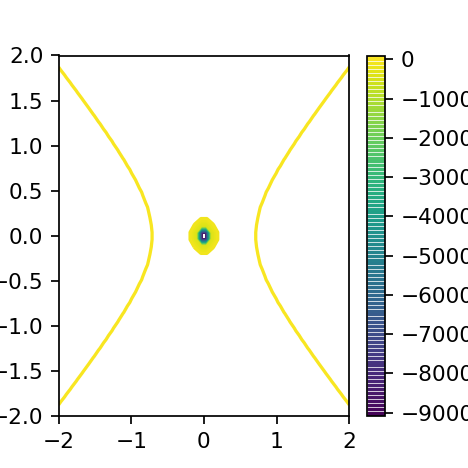

In [21]:
x, y = np.mgrid[-2:2:50j, -2:2:50j]
x1 = y*y - x*x                   
y1 = -2*x*y
r1 = (x*x + y*y)*(x*x + y*y)
pr = 1 - ((x1/r1 + 1)*(x1/r1 + 1) + (y1/r1)*(y1/r1))   #Pressure at infinity is assumed to be 0 , assumed the value of density = 2*pi
plt.figure(figsize=(3,3))
plt.contour(x, y, pr,100); plt.colorbar();

<IPython.core.display.Javascript object>


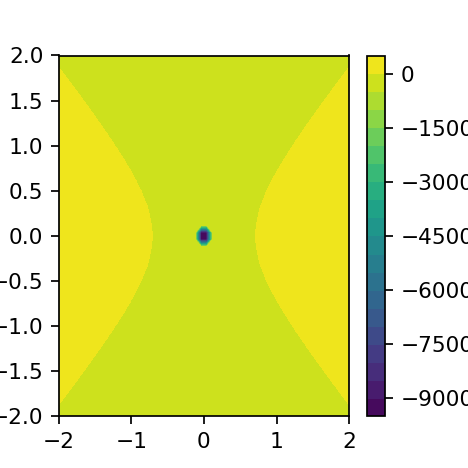

In [22]:
plt.figure(figsize=(3,3))
plt.contourf(x, y, pr , 20); plt.colorbar();

<IPython.core.display.Javascript object>


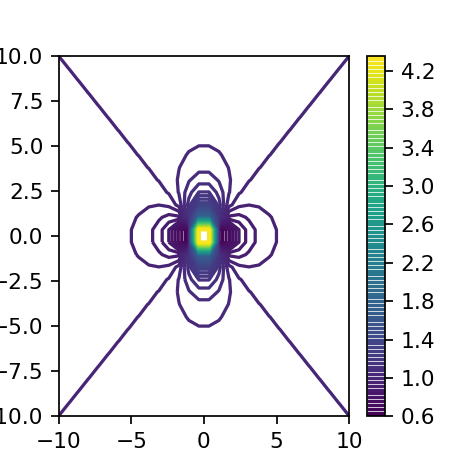

In [23]:
x, y = np.mgrid[-10:10:30j, -10:10:30j]
x1 = y*y - x*x                   
y1 = -2*x*y
r1 = (x*x + y*y)*(x*x + y*y)
velocity = np.sqrt(((x1/r1 + 1)*(x1/r1 + 1) + (y1/r1)*(y1/r1)))
plt.figure(figsize=(3,3))
plt.contour(x, y, velocity,100); plt.colorbar();

<IPython.core.display.Javascript object>


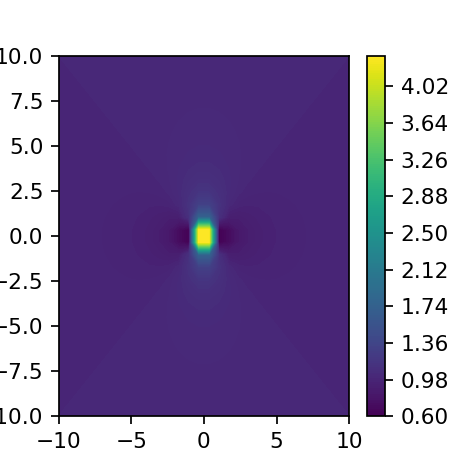

In [24]:
plt.figure(figsize=(3,3))
plt.contourf(x, y, velocity,200); plt.colorbar();

In [25]:
np.max(velocity)

4.32227081520813

In [26]:
np.min(velocity)

0.6013992018617915

<IPython.core.display.Javascript object>


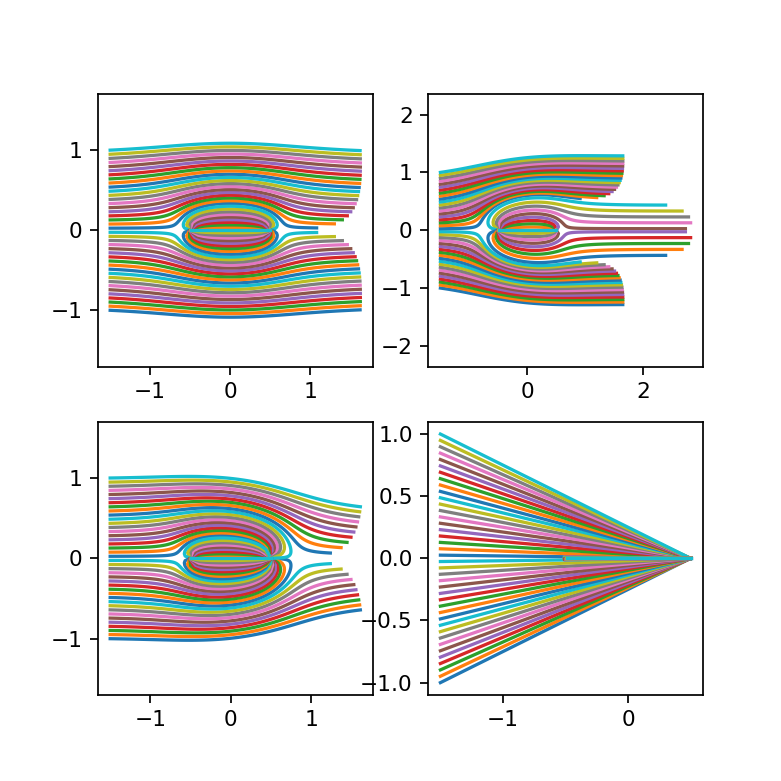

C:\Users\Avinash Arun\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


In [27]:
def src(r, t):
    x, y = r
    x1 = x + 0.5
    r2 = x1*x1 + y*y + 0.0001
    u = x1/(2*pi*r2)
    v = y/(2*pi*r2)
    return np.array([u, v])

def sink(r, t):
    x, y = r
    x1 = x - 0.5
    r2 = x1*x1 + y*y + 0.0001
    u = -x1/(2*pi*r2)
    v = -y/(2*pi*r2)
    return np.array([u, v])


def flow(r, t):
    return src(r, t) + sink(r, t) + np.array([1, 0])

def src2(r, t):
    x, y = r
    x1 = x + 0.5
    r2 = x1*x1 + y*y + 0.0001
    u = 2*x1/(2*pi*r2)
    v = 2*y/(2*pi*r2)
    return np.array([u, v])

def sink2(r, t):
    x, y = r
    x1 = x - 0.5
    r2 = x1*x1 + y*y + 0.0001
    u = -x1/(2*pi*r2)
    v = -y/(2*pi*r2)
    return np.array([u, v])


def flow2(r, t):
    return src2(r, t) + sink2(r, t) + np.array([1, 0])

def src3(r, t):
    x, y = r
    x1 = x + 0.5
    r2 = x1*x1 + y*y + 0.0001
    u = x1/(2*pi*r2)
    v = y/(2*pi*r2)
    return np.array([u, v])

def sink3(r, t):
    x, y = r
    x1 = x - 0.5
    r2 = x1*x1 + y*y + 0.0001
    u = -2*x1/(2*pi*r2)
    v = -2*y/(2*pi*r2)
    return np.array([u, v])


def flow3(r, t):
    return src3(r, t) + sink3(r, t) + np.array([1, 0])

def src4(r, t):
    x, y = r
    x1 = x + 0.5
    r2 = x1*x1 + y*y + 0.0001
    u = x1/(2*pi*r2)
    v = y/(2*pi*r2)
    return np.array([u, v])

def sink4(r, t):
    x, y = r
    x1 = x - 0.5
    r2 = x1*x1 + y*y + 0.0001
    u = -1000*x1/(2*pi*r2)
    v = -1000*y/(2*pi*r2)
    return np.array([u, v])


def flow4(r, t):
    return src4(r, t) + sink4(r, t) + np.array([1, 0])

plt.figure(figsize=(5,5))
plt.axis('equal')
xg = -1.5*np.ones(40)
yg = np.linspace(-1,1, 40)
t = np.linspace(0, 3, 100)
for x, y in zip(xg, yg):
    result = odeint(flow, (x, y), t)
    xr, yr = result.T
    plt.subplot(2,2,1)
    plt.plot(xr, yr)

theta = np.linspace(0, 2*pi, 20)
r = 0.01
xg = r*np.cos(theta) - 0.5
yg = r*np.sin(theta)
for x, y in zip(xg, yg):
    result = odeint(flow, (x, y), t)
    xr, yr = result.T
    plt.subplot(2,2,1)
    plt.plot(xr, yr)

    

plt.axis('equal')
xg = -1.5*np.ones(40)
yg = np.linspace(-1,1, 40)
t = np.linspace(0, 3, 100)
for x, y in zip(xg, yg):
    result = odeint(flow2, (x, y), t)
    xr, yr = result.T
    plt.subplot(2,2,2)
    plt.plot(xr, yr)

theta = np.linspace(0, 2*pi, 20)
r = 0.01
xg = r*np.cos(theta) - 0.5
yg = r*np.sin(theta)
for x, y in zip(xg, yg):
    result = odeint(flow2, (x, y), t)
    xr, yr = result.T
    plt.subplot(2,2,2)
    plt.plot(xr, yr)


plt.axis('equal')
xg = -1.5*np.ones(40)
yg = np.linspace(-1,1, 40)
t = np.linspace(0, 3, 100)
for x, y in zip(xg, yg):
    result = odeint(flow3, (x, y), t)
    xr, yr = result.T
    plt.subplot(2,2,3)
    plt.plot(xr, yr)

theta = np.linspace(0, 2*pi, 20)
r = 0.01
xg = r*np.cos(theta) - 0.5
yg = r*np.sin(theta)
for x, y in zip(xg, yg):
    result = odeint(flow3, (x, y), t)
    xr, yr = result.T
    plt.subplot(2,2,3)
    plt.plot(xr, yr)
    
    
plt.axis('equal')
xg = -1.5*np.ones(40)
yg = np.linspace(-1,1, 40)
t = np.linspace(0, 3, 100)
for x, y in zip(xg, yg):
    result = odeint(flow4, (x, y), t)
    xr, yr = result.T
    plt.subplot(2,2,4)
    plt.plot(xr, yr)

theta = np.linspace(0, 2*pi, 20)
r = 0.01
xg = r*np.cos(theta) - 0.5
yg = r*np.sin(theta)
for x, y in zip(xg, yg):
    result = odeint(flow4, (x, y), t)
    xr, yr = result.T
    plt.subplot(2,2,4)
    plt.plot(xr, yr)

    
    
    
    


# Hence we observe that as the strength of source increases oval opens to the side of sink and vice versa.
# When we increase the strength of either source of sink by a very large amount the curvature of the oval increases and opens to the lower strength side.

In [1]:
%pwd

'C:\\Users\\Avinash Arun'